<h1>Fundamentals of Data Science, Introduction week 2</h1>

**GOAL** In this notebook we are going to cover the following practical aspects of data science:

- Reading a csv file and loading it to a dataframe in python using pandas library
- Filtering out the required columns in the dataframe
- Summarising data based on the fields. Ex: Summing up all the rows corresponding to a certain entry in the dataset
- Plot shape of United States using the geographic data i.e. data with all the coordinates
- Scale and move the states using data of the coordinates
- Colour the states based on the average age of their population

To complete this assignment you need to have a running Anaconda installation with Python 3.6 or 3.7 on your device. Python package prerequisites include:
+  **pandas**
+  **gdal**
+  **shapely**
+  **descartes**

To get these packages installed type 'conda install {package}' into the terminal (linux) or the Anaconda prompt (Windows), for each package you don't have. Gdal can be a bit fussy, there is an alternative install method at the end of this notebook.

**Pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

Pandas is well suited for many different kinds of data:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. 

In [3]:
# Import all the libraries required
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon

<h3>A look at the data</h3>
Throughout this assignment, the dataset that we would be using will be the US population statistics 2010-2016. It can be downloaded from https://www2.census.gov/programs-surveys/popest/datasets/2010-2016/state/asrh/.

As a first step, we will structure the data into a pandas DataFrame to simplify the data manipulation. We will start by loading the csv file of data into a DataFrame called population_data and we will then filter columns based on our use. *Take a look at the data and its fields*

In [4]:
population_data = pd.read_csv('sc-est2016-agesex-civ.csv')
# For viewing the complete dataset
population_data

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV
0,10,0,0,0,United States,0,0,3944160,3951400,3963239,3926677,3931346,3955374,3975414,3970145
1,10,0,0,0,United States,0,1,3978090,3957847,3966617,3978101,3943114,3950083,3974980,3995008
2,10,0,0,0,United States,0,2,4096939,4090856,3971363,3980016,3992752,3959663,3967361,3992154
3,10,0,0,0,United States,0,3,4119051,4111929,4102483,3982920,3992660,4006960,3974468,3982074
4,10,0,0,0,United States,0,4,4063186,4077557,4122286,4112795,3994261,4005464,4020276,3987656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,40,4,8,56,Wyoming,2,82,1102,1104,1081,1129,1185,1044,1072,1095
13568,40,4,8,56,Wyoming,2,83,911,937,1036,1035,1047,1095,961,998
13569,40,4,8,56,Wyoming,2,84,894,884,891,1050,998,992,1050,916
13570,40,4,8,56,Wyoming,2,85,5623,5646,5742,5908,6294,6351,6460,6562


In [5]:
population_data.shape

(13572, 15)

The complete dataset has 13,572 rows and 15 columns. It can be verified by looking at the shape of your dataframe by <i>population_data.shape</i>. To select specific columns, create a list of column names and view the dataframe as:

In [6]:
# Filtering the data by the columns ['NAME','SEX','AGE','POPEST2016_CIV']
population_data[['NAME','SEX','AGE','POPEST2016_CIV']]

,NAME,SEX,AGE,POPEST2016_CIV
0,United States,0,0,3970145
1,United States,0,1,3995008
2,United States,0,2,3992154
3,United States,0,3,3982074
4,United States,0,4,3987656
...,...,...,...,...
13567,Wyoming,2,82,1095
13568,Wyoming,2,83,998
13569,Wyoming,2,84,916
13570,Wyoming,2,85,6562


In [7]:
# Filters out data for all sexes and all age group and store in a new dataframe 'population_data_all'
population_data_all = population_data[population_data['SEX']==0]
population_data_all = population_data_all[population_data_all['AGE']!=999]

In [9]:
# Sum the population of each state for each year on the dataset 'population_data_all'
population_sums = population_data_all.groupby(by=['NAME'], as_index=False)[['POPEST2010_CIV','POPEST2011_CIV','POPEST2012_CIV',
                                              'POPEST2013_CIV','POPEST2014_CIV','POPEST2015_CIV','POPEST2016_CIV']].sum()

<h3> Get a US states geojson file </h3>        
Sources
- ArcGIS shapefile of US 50 states + DC (https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5)
<h4> Recommended – convert to GeoJSON </h4>   
<i> ogr2ogr  -f  GeoJSON  [name1].shp [name2].geojson   </i> - where, 'name1' is the name of the downloaded shp file and 'name2' is the name you want to specify for the geojson file

** NOTE: ** If you are having trouble with this, or you are using Windows, then you can also use https://mapshaper.org/ to convert between formats. During the upload to mapshaper you need to upload <u>all</u> the files from the states_21basic.zip file before conversion. Otherwise you will miss relevant features. 

KeyError: 'features'

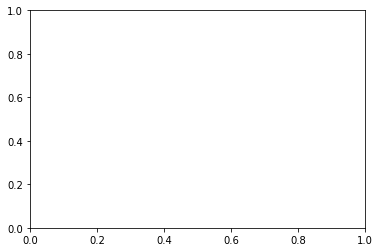

In [15]:
S_DIR = r'states/json' 
BLUE = '#5599ff'

with open(os.path.join(S_DIR, 'states.json')) as rf:    
    data = json.load(rf)

fig = plt.figure() 
ax = fig.gca()
for feature in data['features']:
    geometry = feature['geometry']
    if geometry['type'] == 'Polygon':
        poly = geometry
        ppatch = PolygonPatch(poly, fc=BLUE, ec=BLUE,  alpha=0.5, zorder=2)
        ax.add_patch(ppatch)
    elif geometry['type'] == 'MultiPolygon':
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ppatch = PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
            ax.add_patch(ppatch)
    else:
        print('Don\'t know how to draw :', geometry['type'])

ax.axis('scaled')
plt.axis('off')
plt.show()

**TASKS** <font color="red">
<h3> Improve the map </h3>
    
1) Try a different projection (example: US Census Bureau shapefile)
    
2) Resize and move Alaska 

3) Color the map based on the average age of each state for the year 2016 


<h3> Installations for GDAL </h3>

** IMPORTANT NOTE ** Only follow these if 'conda install gdal' does not work

GDAL - Geospatial Data Abstraction Library <br>
    http://www.gdal.org/index.html

For example,
** On Linux Fedora:** 
         <ul><i>yum install libpng</i>   
         <i> yum install libtiff </i>  
         <i> sudo dnf install gdal gdal-devel</i><br>
         
** In Ubuntu:**
         <ul><i>sudo add-apt-repository ppa:ubuntugis/ppa && sudo apt-get update</i>   
         <i> sudo apt-get install gdal-bin </i>  
         <i> To verify after installation, try: $ ogrinfo</i><br>
         <i> If the installation was successful, you will see something like this:

+ Usage: ogrinfo [--help-general] [-ro] [-q] [-where restricted_where]
               [-spat xmin ymin xmax ymax] [-fid fid]
               [-sql statement] [-al] [-so] [-fields={YES/NO}]
               [-geom={YES/NO/SUMMARY}][--formats]
               datasource_name [layer [layer ...]]
</i><br>
        
**In Windows:**
         Refer to https://sandbox.idre.ucla.edu/sandbox/tutorials/installing-gdal-for-windows   